## NextLab Project-Hotel Booking Prediction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train=pd.read_csv("train_data_evaluation_part_2.csv")
train

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.00,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.00,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,82575,82576,SWE,51.0,12,114,190.08,6.0,0,0,...,0,0,0,0,1,0,0,0,0,0
82576,82576,82577,SWE,50.0,12,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
82577,82577,82578,DEU,50.0,12,18,222.00,255.0,0,0,...,0,0,0,0,0,0,0,0,0,0
82578,82578,82579,PRT,NaN,12,11,255.00,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
drop=train.columns[0:2]
drop

Index(['Unnamed: 0', 'ID'], dtype='object')

In [9]:
train.drop(drop, axis=1, inplace=True)
train.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.isnull().sum()

Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [11]:
train['Age'].isnull().sum()/train.shape[0]*100

4.5362073141196415

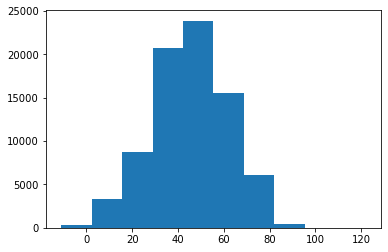

In [12]:
plt.hist(train['Age']);

In [13]:
train['Age']=train['Age'].fillna(train['Age'].median())

In [14]:
train.isnull().sum().any()

False

In [15]:
#working on target variable (BookingsCheckedIn), 0 as not CheckedIn and 1 or more taken as 1 i.e CheckedIn

In [16]:
train['BookingsCheckedIn']=np.where(train['BookingsCheckedIn']>=1, 1, train['BookingsCheckedIn'])

In [17]:
train['BookingsCheckedIn'].value_counts()

1    63186
0    19394
Name: BookingsCheckedIn, dtype: int64

In [18]:
#Data is imbalanced, need to be balanced before training model

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           82580 non-null  object 
 1   Age                   82580 non-null  float64
 2   DaysSinceCreation     82580 non-null  int64  
 3   AverageLeadTime       82580 non-null  int64  
 4   LodgingRevenue        82580 non-null  float64
 5   OtherRevenue          82580 non-null  float64
 6   BookingsCanceled      82580 non-null  int64  
 7   BookingsNoShowed      82580 non-null  int64  
 8   BookingsCheckedIn     82580 non-null  int64  
 9   PersonsNights         82580 non-null  int64  
 10  RoomNights            82580 non-null  int64  
 11  DaysSinceLastStay     82580 non-null  int64  
 12  DaysSinceFirstStay    82580 non-null  int64  
 13  DistributionChannel   82580 non-null  object 
 14  MarketSegment         82580 non-null  object 
 15  SRHighFloor        

In [20]:
num_cols= [features for features in train.columns if train[features].dtype != 'O']
num_cols

['Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'LodgingRevenue',
 'OtherRevenue',
 'BookingsCanceled',
 'BookingsNoShowed',
 'BookingsCheckedIn',
 'PersonsNights',
 'RoomNights',
 'DaysSinceLastStay',
 'DaysSinceFirstStay',
 'SRHighFloor',
 'SRLowFloor',
 'SRAccessibleRoom',
 'SRMediumFloor',
 'SRBathtub',
 'SRShower',
 'SRCrib',
 'SRKingSizeBed',
 'SRTwinBed',
 'SRNearElevator',
 'SRAwayFromElevator',
 'SRNoAlcoholInMiniBar',
 'SRQuietRoom']

In [21]:
neg=[]
for col in num_cols:
    n=(sorted(train[col].unique()))[0]
    if n<0:
        neg.append(col)
print("Columns with negative values : ",neg)
    

Columns with negative values :  ['Age', 'AverageLeadTime', 'DaysSinceLastStay', 'DaysSinceFirstStay']


In [22]:
for col in neg:
    train[col]=np.where(train[col]<0, -(train[col]), train[col])

In [23]:
train['Age']=train['Age'].astype('int')

## EDA

In [22]:
data=train.copy()

In [23]:
data['BookingsCanceled'].value_counts()

0    82462
1       92
2       12
3        8
4        5
9        1
Name: BookingsCanceled, dtype: int64

In [24]:
data['BookingsCanceled']=np.where(data['BookingsCanceled']>=1, 1, data['BookingsCanceled'])

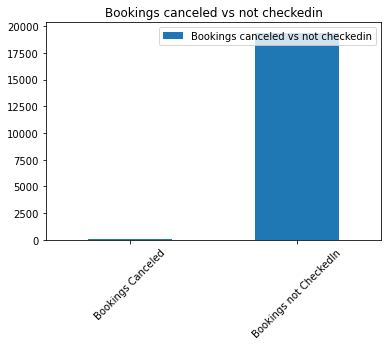

In [135]:
d0=pd.DataFrame([data['BookingsCanceled'].value_counts()[1], data['BookingsCheckedIn'].value_counts()[0]], 
                index=["Bookings Canceled", "Bookings not CheckedIn"], 
                columns=["Bookings canceled vs not checkedin"])
d0.plot(kind='bar')
plt.title("Bookings canceled vs not checkedin")
plt.xticks(rotation="45");

*Booking Canceling rate is too low as compared to the customer that do not checkin*

In [147]:
d1=data['Nationality'].value_counts().head(10)
d1

FRA    12307
PRT    11382
DEU    10164
GBR     8610
ESP     4864
USA     3398
ITA     3301
BEL     3111
BRA     2710
NLD     2698
Name: Nationality, dtype: int64

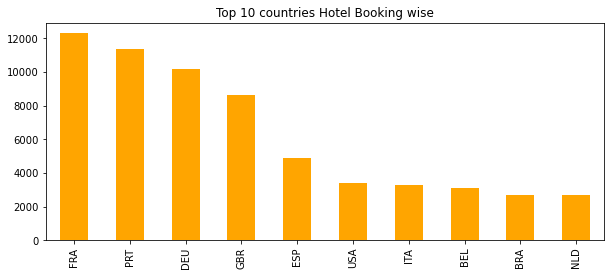

In [155]:
d1.plot(kind='bar', figsize=(10,4), color='orange');
plt.title("Top 10 countries Hotel Booking wise");

*Guests are mostly from Europian Countries, Majorly from France, Protugal, Germany etc*

In [79]:
d2=data.groupby(["MarketSegment","BookingsCheckedIn"]).count()
#d2.plt(kind='bar')

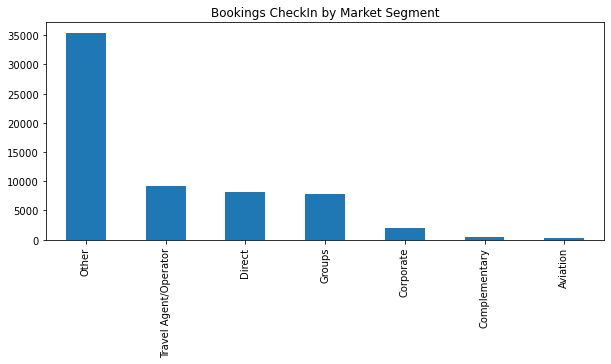

In [132]:
data[data["BookingsCheckedIn"]==1]["MarketSegment"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Bookings CheckIn by Market Segment");

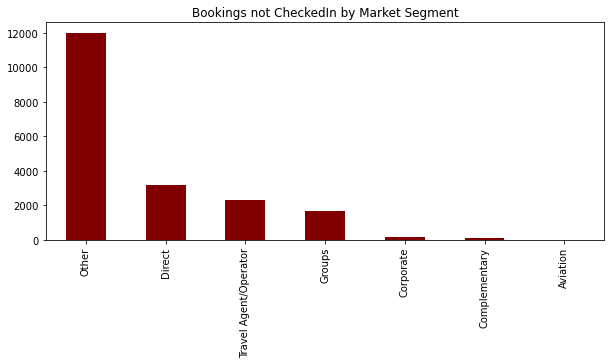

In [131]:
data[data["BookingsCheckedIn"]==0]["MarketSegment"].value_counts().plot(kind="bar", figsize=(10,4), color='maroon')
plt.title("Bookings not CheckedIn by Market Segment");

*Other category of Market Segment is topping the list in terms of Customer CheckIn or not, Travel Agent/Operator being more feasible for Customer checkin to hotels in comparision to other market segments*

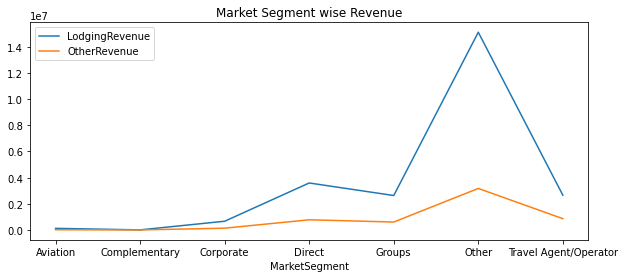

In [123]:
data.groupby('MarketSegment')[['LodgingRevenue', 'OtherRevenue']].sum().plot(figsize=(10,4));
plt.title("Market Segment wise Revenue");

In [124]:
data.groupby('MarketSegment')[['LodgingRevenue', 'OtherRevenue']].sum()

,LodgingRevenue,OtherRevenue
MarketSegment,,
Aviation,127188.35,19473.85
Complementary,11633.26,8561.29
Corporate,671272.74,140829.67
Direct,3594682.01,781950.42
Groups,2635631.19,610277.77
Other,15110116.28,3177166.82
Travel Agent/Operator,2661246.02,868098.27


*Surprisingly Revenue generated by Direct segment is impressive, which is more than Travel Agent/Operator even Customer Bookings are more opted through Travel Agent/Operator, showing Travel Agent/Operator are providing cheaper means for Bookings*

In [102]:
d3=data[data['BookingsCheckedIn']==1]

In [109]:
lead=pd.cut(d3['AverageLeadTime'],[0,30,60,90,600])

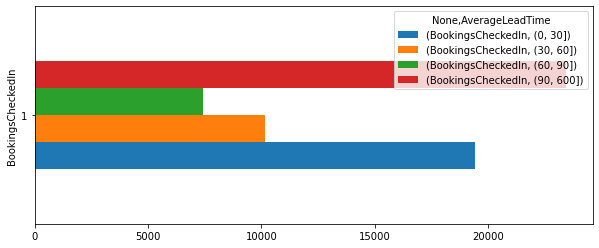

In [116]:
d3.pivot_table(index="BookingsCheckedIn",columns=[lead], aggfunc={"BookingsCheckedIn":'count'}).plot(kind='barh', figsize=(10,4));

*It can be seen that Hotels providing Average lead time of more than 90 days also getting huge demand by Customers*

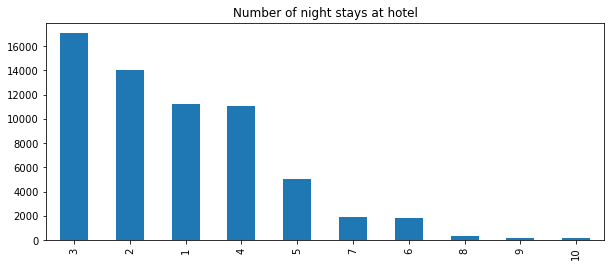

In [171]:
data[data['BookingsCheckedIn']==1]['RoomNights'].value_counts().head(10).plot(kind='bar', figsize=(10,4))
plt.title("Number of night stays at hotel");

*Most People generally stays for 1-4 nights*

### Working on Train Data

In [24]:
def correlation(dataset, threshold):
    col_corr = set()  
    #sim=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                #col = corr_matrix.columns[j]
                col_corr.add(colname)
                #sim.add(col)
    return list(col_corr)

In [25]:
len(correlation(train[num_cols], 0.75))

3

In [26]:
cor=correlation(train[num_cols], 0.75)
cor

['DaysSinceLastStay', 'DaysSinceFirstStay', 'RoomNights']

In [27]:
train.drop(cor, axis=1, inplace=True)

In [28]:
category=[feat for feat in train.columns if train[feat].dtype=='O']
for i in train[category].columns:
    print(i)
    print(train[i].nunique(),"\n")

Nationality
188 

DistributionChannel
4 

MarketSegment
7 



In [29]:
label=train['Nationality'].value_counts().head(15).index
al=train['Nationality'].value_counts().index

In [30]:
d=dict((val,'OTHER') for val in al if val not in label)
train['Nationality']=train['Nationality'].replace(d)

In [31]:
train['Nationality'].value_counts()

FRA      12307
OTHER    11741
PRT      11382
DEU      10164
GBR       8610
ESP       4864
USA       3398
ITA       3301
BEL       3111
BRA       2710
NLD       2698
CHE       2081
IRL       1991
CAN       1514
AUT       1487
SWE       1221
Name: Nationality, dtype: int64

In [32]:
x_train=train.drop(['BookingsCheckedIn'], axis=1)
y_train=train[['BookingsCheckedIn']]

In [33]:
x=pd.get_dummies(x_train[category])

In [34]:
x_train=pd.concat([x_train,x], axis=1)
x_train.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,DistributionChannel,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,PRT,51,150,45,371.0,105.3,1,0,8,Corporate,...,0,0,0,0,0,1,0,0,0,0
1,PRT,46,1095,61,280.0,53.0,0,0,10,Travel Agent/Operator,...,0,0,1,0,0,0,0,0,0,1
2,DEU,31,1095,0,0.0,0.0,0,0,0,Travel Agent/Operator,...,0,0,1,0,0,0,0,0,0,1
3,FRA,60,1095,93,240.0,60.0,0,0,10,Travel Agent/Operator,...,0,0,1,0,0,0,0,0,0,1
4,FRA,51,1095,0,0.0,0.0,0,0,0,Travel Agent/Operator,...,0,0,1,0,0,0,0,0,0,1


In [35]:
x_train.drop(category, axis=1, inplace=True)

In [36]:
x_train.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,SRHighFloor,SRLowFloor,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51,150,45,371.0,105.3,1,0,8,0,0,...,0,0,0,0,0,1,0,0,0,0
1,46,1095,61,280.0,53.0,0,0,10,0,0,...,0,0,1,0,0,0,0,0,0,1
2,31,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,60,1095,93,240.0,60.0,0,0,10,0,0,...,0,0,1,0,0,0,0,0,0,1
4,51,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Feature Selection

In [37]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [38]:
select_feature=SelectFromModel(Lasso(alpha=0.0011, random_state=22))
select_feature.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.0011, random_state=22))

In [39]:
selected_features=x_train.columns[(select_feature.get_support())]
selected_features

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'PersonsNights', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'Nationality_DEU', 'Nationality_ESP', 'Nationality_FRA',
       'Nationality_OTHER', 'Nationality_PRT', 'Nationality_USA',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Groups',
       'MarketSegment_Travel Agent/Operator'],
      dtype='object')

In [40]:
len(selected_features)

21

In [41]:
x_train_selec=x_train[selected_features]

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [43]:
x_train_selec=pd.DataFrame(scale.fit_transform(x_train_selec), columns=x_train_selec.columns)

In [44]:
x_train_selec.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,SRCrib,SRKingSizeBed,SRTwinBed,Nationality_DEU,...,Nationality_FRA,Nationality_OTHER,Nationality_PRT,Nationality_USA,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Travel Agent/Operator
0,0.341060,-0.993032,-0.245171,0.188953,0.326737,0.730314,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,-0.407114,2.501063,-0.207156,-0.078675,-2.141617,6.138335,-0.397709,-0.360569,-0.401865
1,0.031252,2.042553,-0.063204,-0.054796,-0.130049,1.168672,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,-0.407114,2.501063,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398
2,-0.898171,2.042553,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,-0.736496,-0.408104,2.669223,...,-0.418487,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398
3,0.898714,2.042553,0.300729,-0.161939,-0.068911,1.168672,-0.113921,-0.736496,-0.408104,-0.374641,...,2.389561,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398
4,0.341060,2.042553,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,-0.736496,-0.408104,-0.374641,...,2.389561,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398


In [45]:
x_train_selec

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,SRCrib,SRKingSizeBed,SRTwinBed,Nationality_DEU,...,Nationality_FRA,Nationality_OTHER,Nationality_PRT,Nationality_USA,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Travel Agent/Operator
0,0.341060,-0.993032,-0.245171,0.188953,0.326737,0.730314,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,-0.407114,2.501063,-0.207156,-0.078675,-2.141617,6.138335,-0.397709,-0.360569,-0.401865
1,0.031252,2.042553,-0.063204,-0.054796,-0.130049,1.168672,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,-0.407114,2.501063,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398
2,-0.898171,2.042553,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,-0.736496,-0.408104,2.669223,...,-0.418487,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398
3,0.898714,2.042553,0.300729,-0.161939,-0.068911,1.168672,-0.113921,-0.736496,-0.408104,-0.374641,...,2.389561,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398
4,0.341060,2.042553,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,-0.736496,-0.408104,-0.374641,...,2.389561,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,2.488398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,0.341060,-1.436324,0.539560,-0.295653,-0.540545,0.291956,-0.113921,1.357780,-0.408104,-0.374641,...,-0.418487,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865
82576,0.279099,-1.436324,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,1.357780,-0.408104,-0.374641,...,-0.418487,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865
82577,0.279099,-1.436324,-0.552239,-0.210153,1.634212,-0.365582,-0.113921,-0.736496,-0.408104,2.669223,...,-0.418487,-0.407114,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865
82578,0.031252,-1.436324,-0.631850,-0.121760,-0.514343,-0.365582,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,-0.407114,2.501063,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865


In [46]:
import tensorflow

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [48]:
x_train_selec.shape, y_train.shape

((82580, 21), (82580, 1))

In [49]:
model = Sequential()
model.add(Dropout(0.3))
model.add(Dense(1,input_shape=(21,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_selec, y_train, epochs=5)

Epoch 1/5
2581/2581 [==============================] - 6s 2ms/step - loss: 0.3788 - accuracy: 0.8448
Epoch 2/5
2581/2581 [==============================] - 5s 2ms/step - loss: 0.2108 - accuracy: 0.9243
Epoch 3/5
2581/2581 [==============================] - 5s 2ms/step - loss: 0.1886 - accuracy: 0.9247
Epoch 4/5
2581/2581 [==============================] - 5s 2ms/step - loss: 0.1798 - accuracy: 0.9264
Epoch 5/5
2581/2581 [==============================] - 4s 2ms/step - loss: 0.1793 - accuracy: 0.9240


### Working on Test Data

In [50]:
test=pd.read_csv("test_data_evaluation_part2.csv")
test

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,83585,83586,ITA,54.0,0,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83586,83587,IRL,47.0,0,109,327.10,277.5,0,0,...,0,0,0,0,1,0,0,0,0,0
997,83587,83588,IRL,53.0,0,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
998,83588,83589,IRL,85.0,0,109,981.30,9.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
test['BookingsCheckedIn'].value_counts()

0    521
1    473
2      6
Name: BookingsCheckedIn, dtype: int64

In [52]:
print("category not present in test set MarketSegment column : ", 
      set(train['MarketSegment'].unique())-set(test['MarketSegment'].unique()))

category not present in test set MarketSegment column :  {'Groups'}


In [53]:
test.loc[(test['MarketSegment'].index==952), ['MarketSegment']]='Groups'

In [54]:
test[(test['MarketSegment'].index==952)]['MarketSegment']

952    Groups
Name: MarketSegment, dtype: object

In [55]:
def process(data):
    data.drop(drop, axis=1, inplace=True)
    data['BookingsCheckedIn']=np.where(data['BookingsCheckedIn']>=1, 1, data['BookingsCheckedIn'])
    data['Age']=data['Age'].fillna(data['Age'].median())
    data['Age']=data['Age'].astype('int')
    data['Nationality']=data['Nationality'].replace(d)
    x_test=data.drop(['BookingsCheckedIn'], axis=1)
    y_test=data[['BookingsCheckedIn']]
    x=pd.get_dummies(x_test[category])
    x_test=pd.concat([x_test,x], axis=1)
    x_test.drop(category, axis=1, inplace=True)
    x_test_selec=x_test[selected_features]
    x_test_selec=pd.DataFrame(scale.transform(x_test_selec), columns=x_test_selec.columns)
    return x_test_selec, y_test

In [56]:
x_test_selec, y_test = process(test)

In [57]:
x_test_selec.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,SRCrib,SRKingSizeBed,SRTwinBed,Nationality_DEU,...,Nationality_FRA,Nationality_OTHER,Nationality_PRT,Nationality_USA,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Travel Agent/Operator
0,0.093214,-1.439536,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,2.456313,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865
1,-1.827594,-1.439536,0.721526,0.490237,0.761689,2.264567,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,2.456313,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865
2,-1.889556,-1.439536,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,2.456313,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865
3,-2.075440,-1.439536,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,-0.736496,-0.408104,-0.374641,...,-0.418487,2.456313,-0.399830,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865
4,-0.216594,-1.439536,-0.756952,-0.804793,-0.592949,-1.023119,-0.113921,1.357780,-0.408104,-0.374641,...,-0.418487,-0.407114,2.501063,-0.207156,-0.078675,0.466937,-0.162911,-0.397709,-0.360569,-0.401865


In [58]:
y_pred=model.predict(x_test_selec)

32/32 [==============================] - 0s 2ms/step


In [59]:
y_pred=np.where(y_pred>0.5, 1, 0)
y_pred=y_pred.ravel()
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
confusion_matrix(y_test, y_pred)

array([[517,   4],
       [ 67, 412]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       521
           1       0.99      0.86      0.92       479

    accuracy                           0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.93      0.93      1000



In [63]:
import pickle

In [64]:
pickle.dump(scale, open('scale_data.pkl', 'wb'))

In [65]:
from keras.models import load_model

In [66]:
model.save('model_ann.h5')